In [1]:
pip install pytrends


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
data = pd.read_csv('trends_covid_symptoms_test_simulated.csv')
data.head()

,date,covid symptoms,covid test
0,2020-01-05,57.450712,95.978027
1,2020-01-12,47.926035,53.634941
2,2020-01-19,59.715328,71.070984
3,2020-01-26,72.845448,82.385465
4,2020-02-02,46.487699,53.001612


In [3]:
data.describe

<bound method NDFrame.describe of            date  covid symptoms  covid test
0    2020-01-05       57.450712   95.978027
1    2020-01-12       47.926035   53.634941
2    2020-01-19       59.715328   71.070984
3    2020-01-26       72.845448   82.385465
4    2020-02-02       46.487699   53.001612
..          ...             ...         ...
204  2023-12-03       29.334959   42.111728
205  2023-12-10       35.932624   39.255765
206  2023-12-17       57.725529   50.240664
207  2023-12-24       57.706789   73.218309
208  2023-12-31       57.725715   58.882462

[209 rows x 3 columns]>

In [4]:
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace = True)

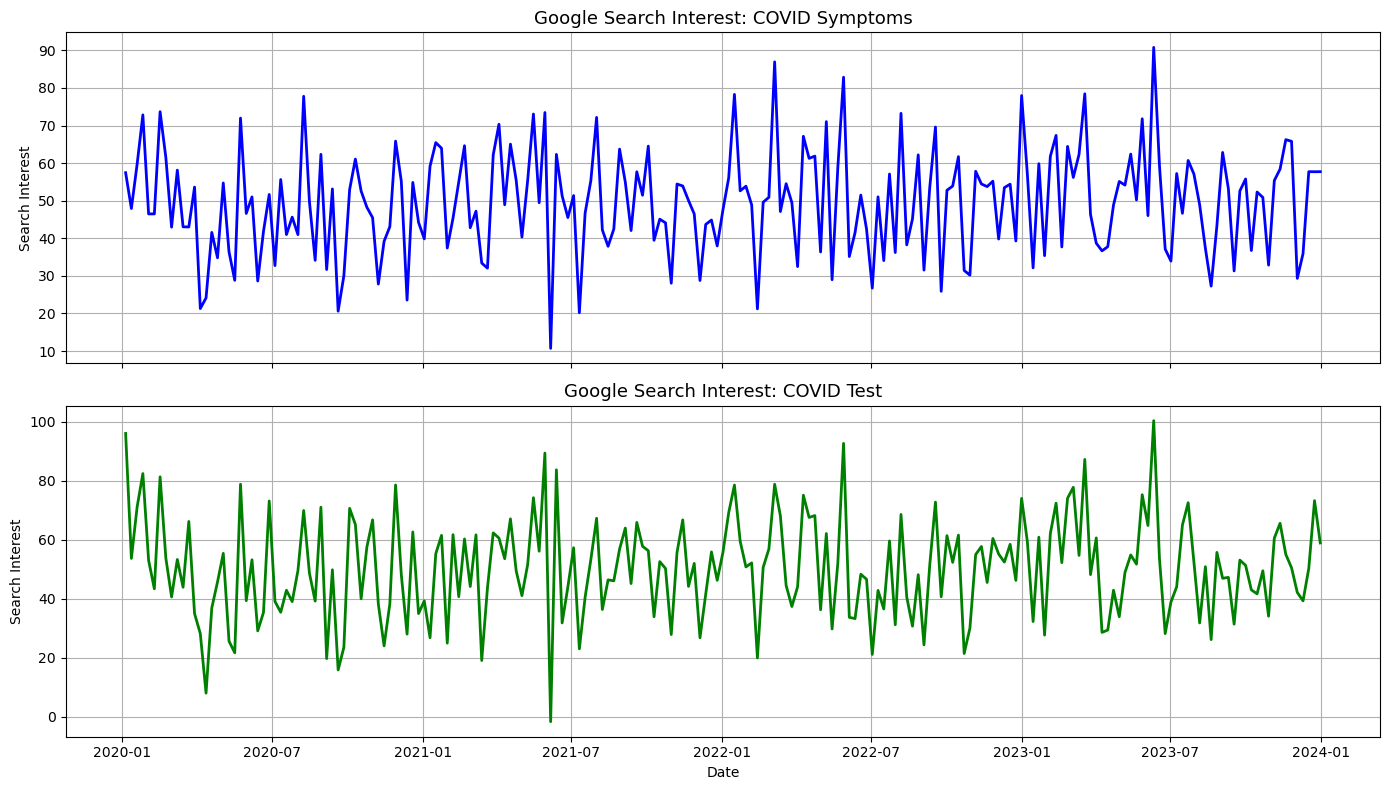

In [5]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1, figsize=(14, 8), sharex=True)

# Plot 1: covid symptoms
axs[0].plot(data.index, data['covid symptoms'], color='blue', linewidth=2)
axs[0].set_title('Google Search Interest: COVID Symptoms', fontsize=13)
axs[0].set_ylabel('Search Interest')
axs[0].grid(True)

# Plot 2: covid test
axs[1].plot(data.index, data['covid test'], color='green', linewidth=2)
axs[1].set_title('Google Search Interest: COVID Test', fontsize=13)
axs[1].set_ylabel('Search Interest')
axs[1].set_xlabel('Date')
axs[1].grid(True)


plt.tight_layout()
plt.show()

##### 1. ADF Test for stationarity

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
def adf_test(series, name):
    result = adfuller(series)
    print(f"ADF Test for {name}:")
    print(f" Test Statistic : {result[0]:.4f}")
    print(f" p-value : {result[1]:.4f}")
    print(f" Critical Values:")
    for key, value in result[4].items():
        print(f" {key}: {value:.4f}")
    print(" =>", "Stationary" if result[1] < 0.05 else "Non-stationary", "\n")

In [8]:
adf_test(data['covid symptoms'], 'covid symptomps')
adf_test(data['covid test'], 'covid test')

ADF Test for covid symptomps:
 Test Statistic : -6.5816
 p-value : 0.0000
 Critical Values:
 1%: -3.4628
 5%: -2.8758
 10%: -2.5744
 => Stationary 

ADF Test for covid test:
 Test Statistic : -14.5191
 p-value : 0.0000
 Critical Values:
 1%: -3.4622
 5%: -2.8755
 10%: -2.5742
 => Stationary 



##### 2. Granger Causality Test

`covid symptoms`  →  `covid test`

To investigate whether the number of Google searches for "covid symptoms" helps predict future searches for "covid test", we applied the Granger causality test with lags up to 4.

 Hypothesis:
- **H₀ (null):** "covid symptoms" does NOT Granger-cause "covid test"
- **H₁ (alternative):** "covid symptoms" Granger-causes "covid test"

In [9]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 5

print("Granger Causality Test: covid symptoms → covid test")
grangercausalitytests(data[['covid test', 'covid symptoms']], maxlag=max_lag, verbose=True)

print("\nGranger Causality Test: covid test → covid symptoms")
grangercausalitytests(data[['covid symptoms', 'covid test']], maxlag=max_lag, verbose=True)

Granger Causality Test: covid symptoms → covid test

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2061  , p=0.6503  , df_denom=205, df_num=1
ssr based chi2 test:   chi2=0.2091  , p=0.6474  , df=1
likelihood ratio test: chi2=0.2090  , p=0.6475  , df=1
parameter F test:         F=0.2061  , p=0.6503  , df_denom=205, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.5357  , p=0.5861  , df_denom=202, df_num=2
ssr based chi2 test:   chi2=1.0980  , p=0.5775  , df=2
likelihood ratio test: chi2=1.0951  , p=0.5784  , df=2
parameter F test:         F=0.5357  , p=0.5861  , df_denom=202, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2212  , p=0.8816  , df_denom=199, df_num=3
ssr based chi2 test:   chi2=0.6870  , p=0.8763  , df=3
likelihood ratio test: chi2=0.6858  , p=0.8765  , df=3
parameter F test:         F=0.2212  , p=0.8816  , df_denom=199, df_num=3

Granger Causality
number of lags (no zero

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (1.7308343449701364, 0.18977381556037948, 205.0, 1),
   'ssr_chi2test': (1.7561636280672606, 0.18510375094706974, 1),
   'lrtest': (1.7487913678437508, 0.18602874642635148, 1),
   'params_ftest': (1.7308343449701271, 0.18977381556037948, 205.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.023767883582403, 0.13482747337163092, 202.0, 2),
   'ssr_chi2test': (4.147722296055024, 0.12569949913155168, 2),
   'lrtest': (4.106714590348247, 0.12830342721929214, 2),
   'params_ftest': (2.0237678835823454, 0.13482747337163908, 202.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.2175388151144464, 0.30446697991468746, 199.0, 3),
   'ssr_chi2test': (3.7811004409081796, 0.28609213323145005, 3),
   'lrtest': (3.746818520603483, 0.29013292412377656, 3),
   'params_ftest': (1.2175388151144226, 0.30446697991470223, 199.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

Results:
All p-values for lag orders 1 to 4 were greater than 0.05:
- Lag 1: p = 0.6503
- Lag 2: p = 0.5861
- Lag 3: p = 0.8816
- Lag 4: p = 0.4046

We fail to reject the null hypothesis. There is **no evidence** that "covid symptoms" Granger-causes "covid test" in this dataset.


`covid test` → `covid symptoms`

This test evaluates whether past values of "covid test" help predict "covid symptoms" using lag values from 1 to 4.

 Hypothesis:

- **Null Hypothesis (H₀):** "covid test" does NOT Granger-cause "covid symptoms"
- **Alternative Hypothesis (H₁):** "covid test" Granger-causes "covid symptoms"

In [10]:
grangercausalitytests(data[['covid symptoms', 'covid test']], maxlag=4, verbose = True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.7308  , p=0.1898  , df_denom=205, df_num=1
ssr based chi2 test:   chi2=1.7562  , p=0.1851  , df=1
likelihood ratio test: chi2=1.7488  , p=0.1860  , df=1
parameter F test:         F=1.7308  , p=0.1898  , df_denom=205, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0238  , p=0.1348  , df_denom=202, df_num=2
ssr based chi2 test:   chi2=4.1477  , p=0.1257  , df=2
likelihood ratio test: chi2=4.1067  , p=0.1283  , df=2
parameter F test:         F=2.0238  , p=0.1348  , df_denom=202, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.2175  , p=0.3045  , df_denom=199, df_num=3
ssr based chi2 test:   chi2=3.7811  , p=0.2861  , df=3
likelihood ratio test: chi2=3.7468  , p=0.2901  , df=3
parameter F test:         F=1.2175  , p=0.3045  , df_denom=199, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.0280  , p=0.3939  

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


{1: ({'ssr_ftest': (1.7308343449701364, 0.18977381556037948, 205.0, 1),
   'ssr_chi2test': (1.7561636280672606, 0.18510375094706974, 1),
   'lrtest': (1.7487913678437508, 0.18602874642635148, 1),
   'params_ftest': (1.7308343449701271, 0.18977381556037948, 205.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (2.023767883582403, 0.13482747337163092, 202.0, 2),
   'ssr_chi2test': (4.147722296055024, 0.12569949913155168, 2),
   'lrtest': (4.106714590348247, 0.12830342721929214, 2),
   'params_ftest': (2.0237678835823454, 0.13482747337163908, 202.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])]),
 3: ({'ssr_ftest': (1.2175388151144464, 0.30446697991468746, 199.0, 3),
   'ssr_chi2test': (3.7811004409081796, 0.28609213323145005, 3),
   'lrtest': (3.746818520603483, 0.29013292412377656, 3),
   'params_ftest': (1.2175388151144226, 0.30446697991470223, 199.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 

**Result:**
All p-values > 0.05:
- Lag 1: p = 0.1898
- Lag 2: p = 0.1348
- Lag 3: p = 0.3045
- Lag 4: p = 0.3939

We fail to reject the null hypothesis. There is no evidence of Granger causality from "covid test" to "covid symptoms".

3. VAR (Vector Autoregression) Model

In [11]:
from statsmodels.tsa.api import VAR

model = VAR(data[['covid symptoms', 'covid test']])

# Evaluation of lag order using AIC, BIC, FPE and HQIC
lag_results = model.select_order(maxlags=10)

print(lag_results.summary())


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0       9.811*      9.845*  1.824e+04*      9.825*
1        9.830       9.929   1.857e+04       9.870
2        9.850       10.02   1.895e+04       9.917
3        9.882       10.11   1.958e+04       9.976
4        9.890       10.19   1.973e+04       10.01
5        9.904       10.27   2.001e+04       10.05
6        9.926       10.36   2.047e+04       10.10
7        9.962       10.46   2.121e+04       10.16
8        9.987       10.55   2.176e+04       10.21
9        10.02       10.65   2.250e+04       10.27
10       10.05       10.74   2.314e+04       10.33
--------------------------------------------------


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


Lag Order Selection

We applied a lag order selection procedure using the `VAR.select_order()` method with a maximum lag of 10. According to all information criteria (AIC, BIC, FPE, and HQIC), the optimal lag length was reported as **0**.

However, we have chosen to proceed with a **lag length of 1** for the following reasons:

- VAR(0) implies no temporal dependency, which is not realistic for time series with potential autocorrelation.
- Lag 1 allows the model to capture short-term dynamics between the variables.
- Given our limited sample size (208 observations), a VAR(1) specification offers a more parsimonious and stable modeling choice.

Thus, we fit a **VAR(1)** model to better capture potential interactions between the series over time.

In [56]:
split_index = int(len(data) * 0.8)
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

In [87]:
len(test_data)

42

In [58]:
from statsmodels.tsa.api import VAR

var_model = VAR(train_data)
var_results = var_model.fit(maxlags=1)

var_results.summary()

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Sun, 01, Jun, 2025
Time:                     17:31:52
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.88939
Nobs:                     166.000    HQIC:                   9.82256
Log likelihood:          -1276.57    FPE:                    17622.2
AIC:                      9.77691    Det(Omega_mle):         17002.1
--------------------------------------------------------------------
Results for equation covid symptoms
                       coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------------
const                    53.857331         3.984028           13.518           0.000
L1.covid symptoms        -0.192601         0.139783           -1.378           0.168
L1.covid test             0.096042 

Both equations in the VAR(1) model showed that the lagged values of "covid symptoms" and "covid test" were not statistically significant predictors of each other (p-values > 0.05).

This aligns with the Granger causality tests, suggesting that neither time series has strong predictive power over the other when considering only past values.

The residual correlation was moderately high (≈ 0.82), indicating simultaneous movement but not predictive causality.

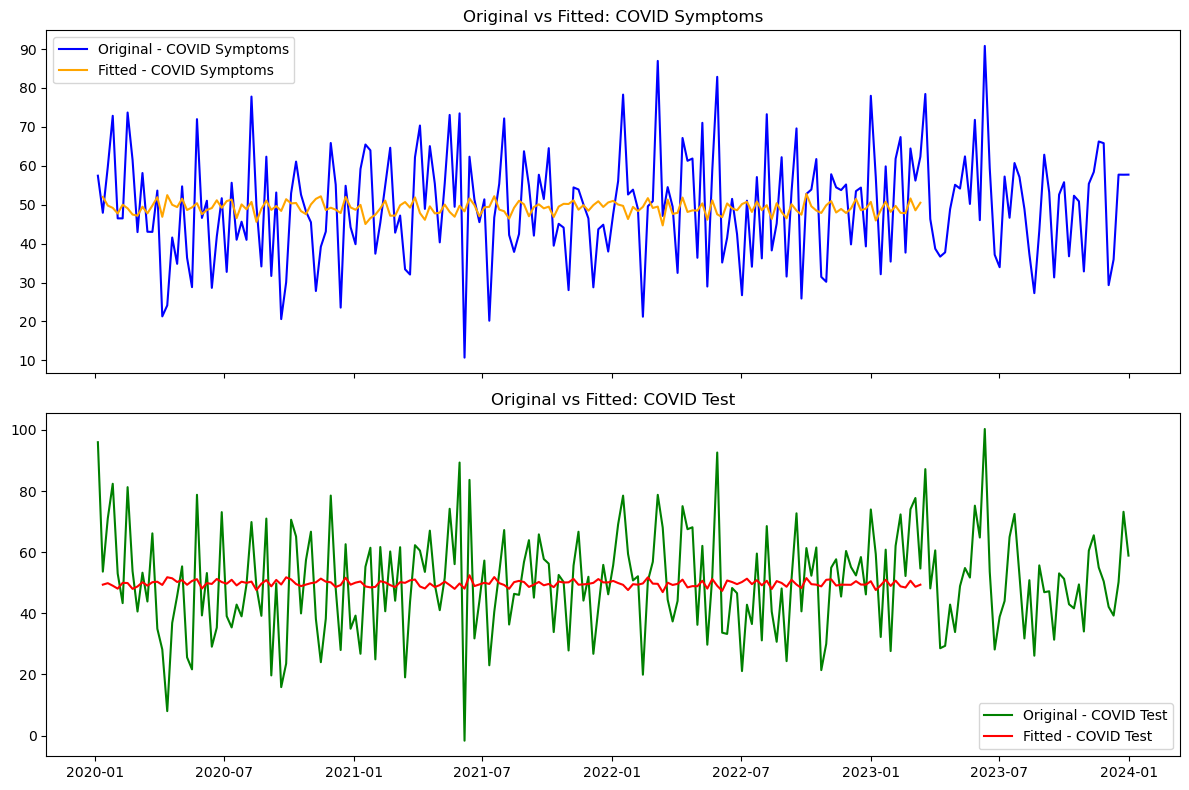

In [59]:
import matplotlib.pyplot as plt

fitted_values = var_results.fittedvalues

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# Original vs Fitted: COVID Symptoms
axes[0].plot(data['covid symptoms'], label='Original - COVID Symptoms', color='blue')
axes[0].plot(fitted_values['covid symptoms'], label='Fitted - COVID Symptoms', color='orange')
axes[0].set_title('Original vs Fitted: COVID Symptoms')
axes[0].legend()

# Original vs Fitted: COVID Test
axes[1].plot(data['covid test'], label='Original - COVID Test', color='green')
axes[1].plot(fitted_values['covid test'], label='Fitted - COVID Test', color='red')
axes[1].set_title('Original vs Fitted: COVID Test')
axes[1].legend()

plt.tight_layout()
plt.show()

Diagnostic: Actual vs Fitted Values (In-Sample)

To evaluate the in-sample fit of the VAR(1) model, we plotted the actual and fitted values for both time series: "covid symptoms" and "covid test".

**Observations:**

- For **covid symptoms**, the fitted values generally follow the trend of the actual values. However, the model appears to smooth out the fluctuations, failing to fully capture the high variability present in the actual data.

- For **covid test**, the fitted values remain almost flat and do not reflect the changes in the actual data at all. This suggests that the model is not able to capture meaningful dynamics in this series.

These observations are consistent with earlier results: low Granger causality and insignificant coefficients in the VAR(1) model indicate that the series may not be strongly connected dynamically.


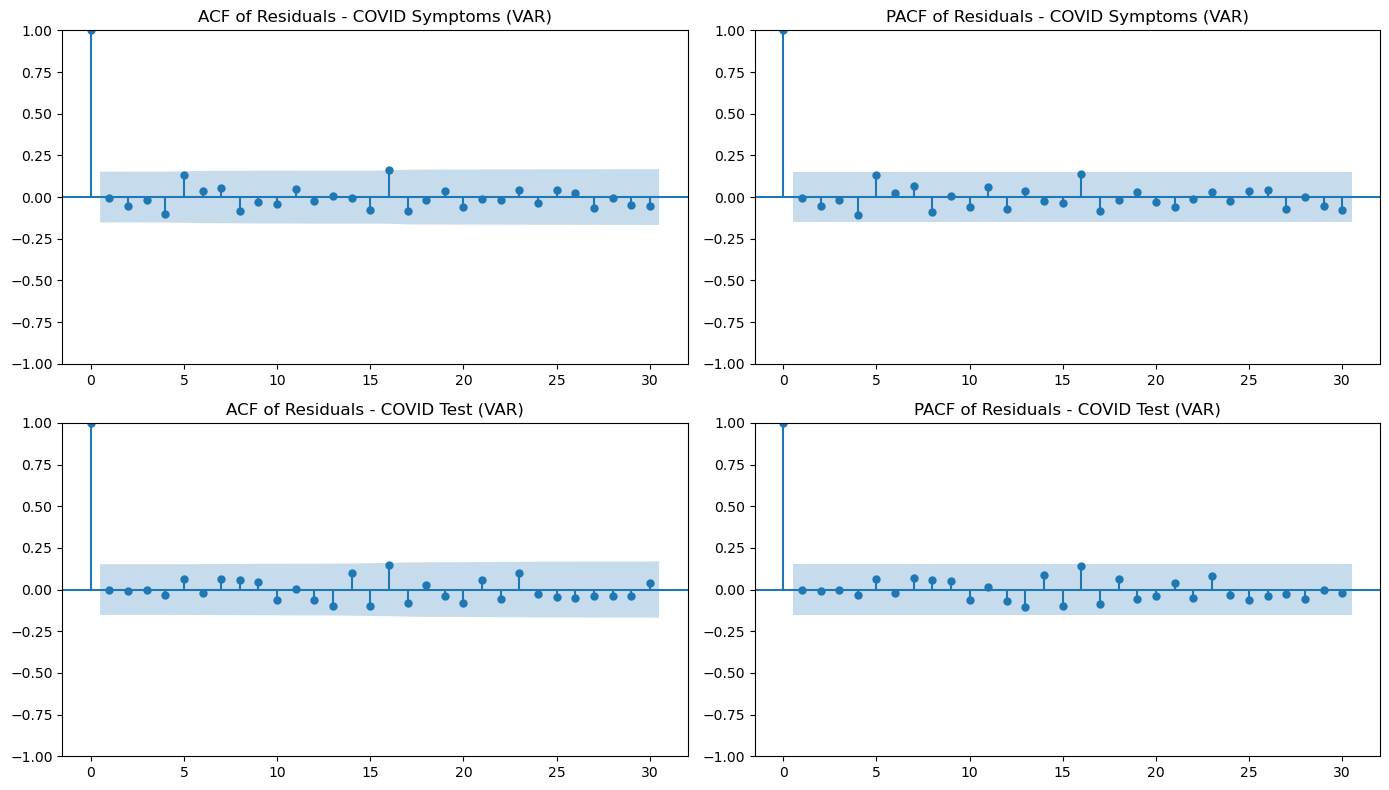

In [60]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

residuals_var = var_results.resid

fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# COVID Symptoms - ACF
plot_acf(residuals_var['covid symptoms'], lags=30, ax=axes[0, 0])
axes[0, 0].set_title('ACF of Residuals - COVID Symptoms (VAR)')

# COVID Symptoms - PACF
plot_pacf(residuals_var['covid symptoms'], lags=30, ax=axes[0, 1])
axes[0, 1].set_title('PACF of Residuals - COVID Symptoms (VAR)')

# COVID Test - ACF
plot_acf(residuals_var['covid test'], lags=30, ax=axes[1, 0])
axes[1, 0].set_title('ACF of Residuals - COVID Test (VAR)')

# COVID Test - PACF
plot_pacf(residuals_var['covid test'], lags=30, ax=axes[1, 1])
axes[1, 1].set_title('PACF of Residuals - COVID Test (VAR)')

plt.tight_layout()
plt.show()

To assess whether the VAR(1) model has adequately captured the autocorrelation structure of the data, we examined the ACF and PACF plots of the residuals for both time series.

**covid symptoms:**
- Both ACF and PACF plots show that the autocorrelations lie well within the 95% confidence bounds.
- No significant lags stand out, which suggests that the residuals are approximately white noise.
- This indicates that the model effectively captures the dynamic structure of this series.

**covid test:**
- Similarly, the ACF and PACF plots for "covid test" residuals do not show any significant autocorrelation.
- The residuals are scattered randomly around zero, with no visible pattern or significant spikes.
- Despite the poor model fit in terms of actual vs fitted values, the lack of autocorrelation suggests that the residuals are not predictable, and the model is not missing clear lag structure.

For both series, the residuals appear to be uncorrelated, which validates the use of VAR(1) from a diagnostic standpoint. However, the overall model performance still varies across series — it is more effective for "covid symptoms" than for "covid test".

In [61]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Apply Ljung-Box test on residuals of both series
ljung_symptoms_var = acorr_ljungbox(residuals_var['covid symptoms'], lags=[10], return_df=True)
ljung_test_var = acorr_ljungbox(residuals_var['covid test'], lags=[10], return_df=True)

print("Ljung-Box Test for COVID Symptoms Residuals:")
print(ljung_symptoms_var)

print("\nLjung-Box Test for COVID Test Residuals:")
print(ljung_test_var)


Ljung-Box Test for COVID Symptoms Residuals:
     lb_stat  lb_pvalue
10  7.853049   0.643188

Ljung-Box Test for COVID Test Residuals:
     lb_stat  lb_pvalue
10  3.281611   0.973999


In [62]:
from statsmodels.api import OLS, add_constant
from statsmodels.stats.diagnostic import acorr_breusch_godfrey

# Use the same data you used to fit the VAR model
data_for_bg_test = data[['covid symptoms', 'covid test']]

# Test for covid symptoms equation
X_symptoms = add_constant(data_for_bg_test[['covid symptoms', 'covid test']])
y_symptoms = data_for_bg_test['covid symptoms']
ols_model_symptoms = OLS(y_symptoms, X_symptoms).fit()
bg_test_symptoms = acorr_breusch_godfrey(ols_model_symptoms, nlags=10)

# Test for covid test equation
X_test = add_constant(data_for_bg_test[['covid symptoms', 'covid test']])
y_test = data_for_bg_test['covid test']
ols_model_test = OLS(y_test, X_test).fit()
bg_test_test = acorr_breusch_godfrey(ols_model_test, nlags=10)

# Results
print("Breusch-Godfrey Test for COVID Symptoms:", [round(val, 2) for val in bg_test_symptoms])
print("Breusch-Godfrey Test for COVID Test:", [round(val, 2) for val in bg_test_test])

Breusch-Godfrey Test for COVID Symptoms: [133.53, 0.0, 1506.59, 0.0]
Breusch-Godfrey Test for COVID Test: [198.76, 0.0, 23572.22, 0.0]


c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 3
  warnings.warn('covariance of constraints does not have full '
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\base\model.py:1888: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 10, but rank is 3
  warnings.warn('covariance of constraints does not have full '


Model Selection Based on Information Criteria

In [63]:
# Estimate VAR(1), VAR(2), and VAR(3)
results_var1 = model.fit(1)
results_var2 = model.fit(2)
results_var3 = model.fit(3)

# Create comparison table
criteria_comparison = {
"AIC": [results_var1.aic, results_var2.aic, results_var3.aic],
"BIC": [results_var1.bic, results_var2.bic, results_var3.bic],
"FPE": [results_var1.fpe, results_var2.fpe, results_var3.fpe],
"HQIC": [results_var1.hqic, results_var2.hqic, results_var3.hqic]
}

import pandas as pd
criteria_df = pd.DataFrame(criteria_comparison, index=["VAR(1)", "VAR(2)", "VAR(3)"])
criteria_df.round(4)

,AIC,BIC,FPE,HQIC
VAR(1),9.8054,9.9017,18131.3900,9.8443
VAR(2),9.8291,9.9901,18566.3481,9.8942
VAR(3),9.8670,10.0932,19284.5902,9.9585


Model Selection Based on Information Criteria

VAR(1) has the lowest values for AIC, BIC, FPE, and HQIC.

Although VAR(2) and VAR(3) offer slightly better AIC and FPE than each other, their BIC and HQIC values increase due to the penalty for added complexity.

Therefore, VAR(1) remains the most parsimonious and statistically optimal model based on all four criteria.

We continue our analysis using the VAR(1) model.

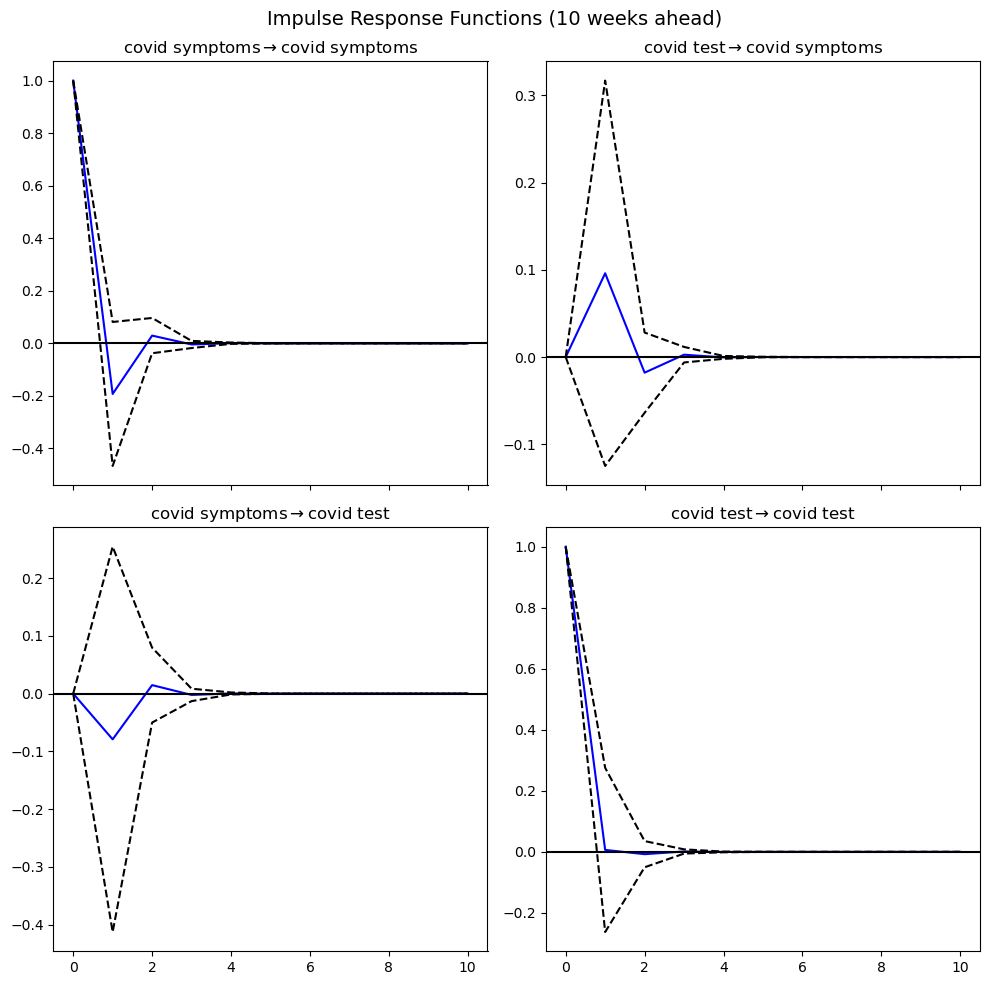

In [64]:
# Calculate IRF from fitted VAR(1) model
irf_var = var_results.irf(10) # 10 steps ahead

irf_var.plot(orth=False)
plt.suptitle("Impulse Response Functions (10 weeks ahead)", fontsize=14)
plt.tight_layout()
plt.show()

We analyzed 10-week impulse responses from the VAR(1) model:

1. COVID Test → COVID Symptoms:

Small, short-term positive effect peaking at lag 1, fades quickly.

2. COVID Symptoms → COVID Test:

Slight negative response, also disappears within 3 lags.

3. Own shocks:

Both series stabilize quickly, showing stationarity.

These results suggest limited short-term interactions between the two series.

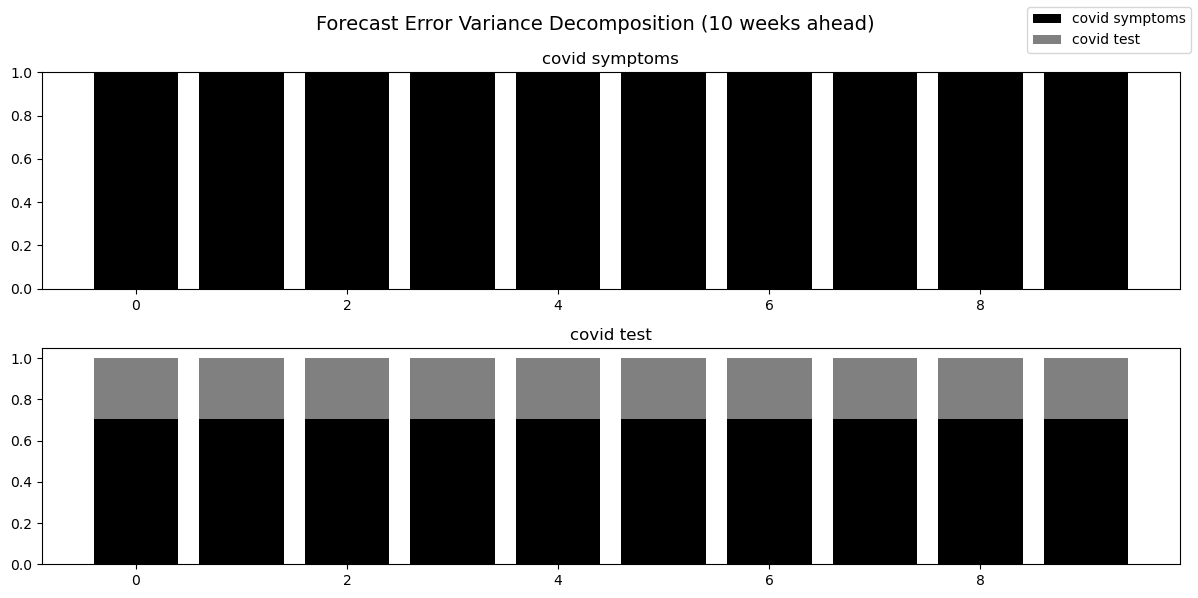

In [65]:
# Calculate FEVD from fitted VAR(1) model
fevd_var = var_results.fevd(10) # 10 steps ahead

# Plot FEVD
fevd_var.plot(figsize=(12,6))
plt.suptitle("Forecast Error Variance Decomposition (10 weeks ahead)", fontsize=14)
plt.tight_layout()
plt.show()

The FEVD plots show that the forecast error variance of the COVID symptoms series is almost entirely explained by its own shocks over the 10-week horizon. In contrast, the COVID test series variance is influenced not only by its own shocks but also moderately by shocks in the COVID symptoms series. This indicates that COVID symptoms is more exogenous, while COVID test is somewhat more responsive to changes in the other variable.

In [101]:
forecast_steps = len(test_data)
forecast_input = train_data[['covid symptoms', 'covid test']].values[-var_results.k_ar:]
forecast_var = var_results.forecast(y=forecast_input, steps=len(test_data))

forecast_index = test_data.index
forecast_df_var = pd.DataFrame(
    forecast_var,
    index=forecast_index,
    columns=['covid symptoms', 'covid test']
)


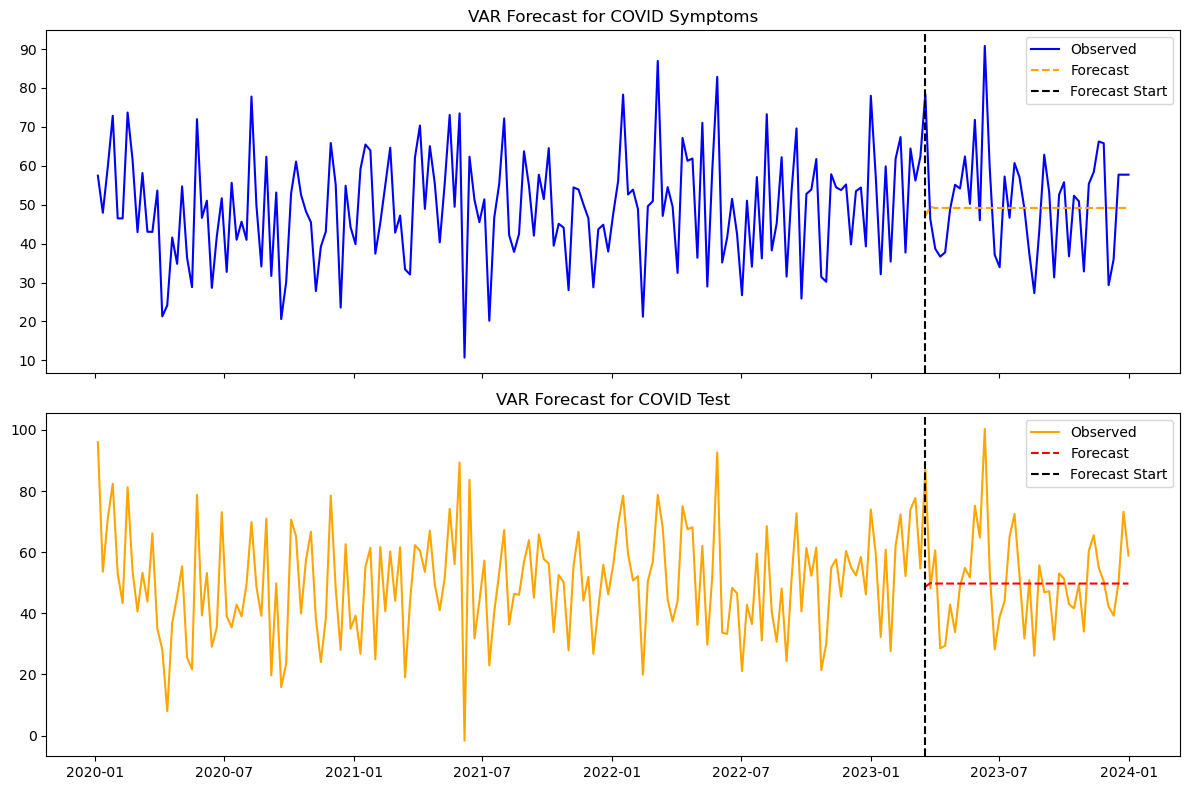

In [110]:
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# COVID Symptoms
axes[0].plot(data['covid symptoms'], label='Observed', color='blue')
axes[0].plot(forecast_df_var['covid symptoms'], label='Forecast', color='orange', linestyle='--')
axes[0].set_title('VAR Forecast for COVID Symptoms')
axes[0].axvline(x=forecast_df_var.index[0], color='black', linestyle='--', label='Forecast Start')
axes[0].legend()

# COVID Test
axes[1].plot(data['covid test'], label='Observed', color='orange')
axes[1].plot(forecast_df_var['covid test'], label='Forecast', color='red', linestyle='--')
axes[1].set_title('VAR Forecast for COVID Test')
axes[1].axvline(x=forecast_df_var.index[0], color='black', linestyle='--', label='Forecast Start')
axes[1].legend()

plt.tight_layout()
plt.show()

The VAR(1) forecasts for both COVID symptoms and COVID test series appear relatively flat compared to the observed data. While the model captures the general level of each series, it fails to reflect the short-term fluctuations and local peaks present in the actual values. This may indicate that a simple VAR(1) specification is insufficient to model the full dynamics of the system, or that cross-variable influence is weak in this context.

In [113]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define MAPE and sMAPE functions
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))

# True test values
true_symptoms_var = test_data['covid symptoms'].values
true_test_var = test_data['covid test'].values

forecast_symptoms_var = forecast_df_var['covid symptoms'].values
forecast_test_var = forecast_df_var['covid test'].values

# Calculate metrics for covid symptoms
rmse_symptoms_var = np.sqrt(mean_squared_error(true_symptoms_var, forecast_symptoms_var))
mae_symptoms_var = mean_absolute_error(true_symptoms_var, forecast_symptoms_var)
mape_symptoms_var = mape(true_symptoms_var, forecast_symptoms_var)
smape_symptoms_var = smape(true_symptoms_var, forecast_symptoms_var)

# Calculate metrics for covid test
rmse_test_var = np.sqrt(mean_squared_error(true_test_var, forecast_test_var))
mae_test_var = mean_absolute_error(true_test_var, forecast_test_var)
mape_test_var = mape(true_test_var, forecast_test_var)
smape_test_var = smape(true_test_var, forecast_test_var)

import pandas as pd

metrics_var = pd.DataFrame({
    'RMSE': [rmse_symptoms_var, rmse_test_var],
    'MAE': [mae_symptoms_var, mae_test_var],
    'MAPE (%)': [mape_symptoms_var, mape_test_var],
    'sMAPE (%)': [smape_symptoms_var, smape_test_var]
}, index=['covid symptoms', 'covid test'])

print(metrics_var.round(2))

                 RMSE    MAE  MAPE (%)  sMAPE (%)
covid symptoms  13.61  10.86     22.95      21.81
covid test      15.77  11.64     24.91      23.03


4. ARIMA Modeling

In this section, we apply the Box-Jenkins methodology to build ARIMA (and possibly SARIMA) models for the two time series:
- **COVID Symptoms**
- **COVID Test**

We begin with autocorrelation analysis to decide appropriate ARIMA specification. If seasonal patterns are observed, a SARIMA model may be considered.

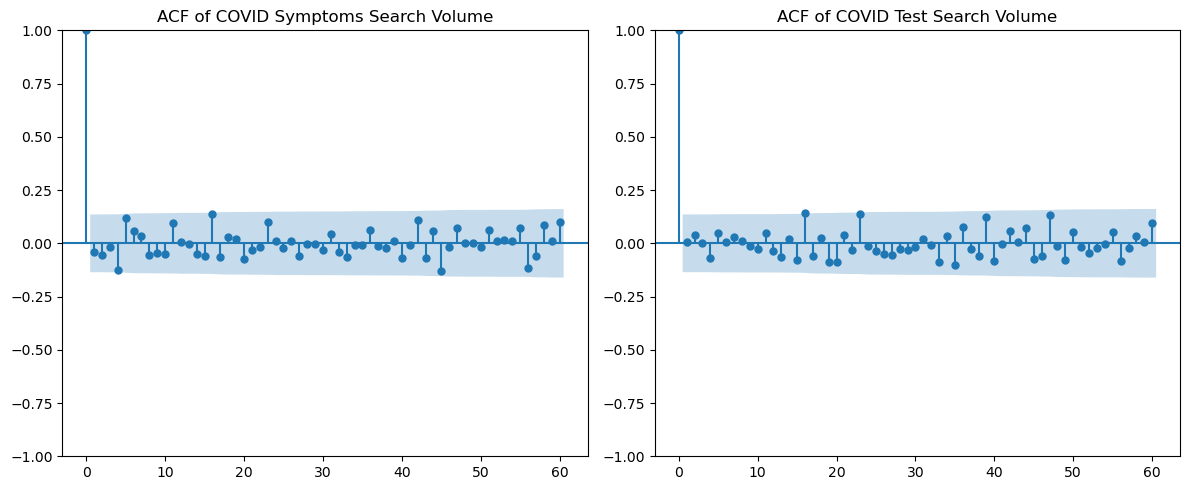

In [40]:
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5)) # Tek figür, iki subplot

# ACF - covid symptoms
plt.subplot(1, 2, 1)
plot_acf(data['covid symptoms'], lags=60, ax=plt.gca())
plt.title('ACF of COVID Symptoms Search Volume')

# ACF - covid test
plt.subplot(1, 2, 2)
plot_acf(data['covid test'], lags=60, ax=plt.gca())
plt.title('ACF of COVID Test Search Volume')

plt.tight_layout()
plt.show()

Seasonality Assessment via ACF Plots

To determine whether a seasonal ARIMA (SARIMA) model is needed, we examined the autocorrelation function (ACF) plots for both time series: **COVID Symptoms** and **COVID Test** search volumes.

- For both series, the ACF plots did **not exhibit any clear seasonal spikes** at regular intervals (e.g., lag 12, lag 24, lag 52), which are typical signs of seasonality.
- Most autocorrelations beyond lag 1 are close to zero and fall well within the 95% confidence intervals, indicating a **lack of strong seasonal structure**.

Given the absence of significant and regular autocorrelation patterns in both series, we conclude that there is **no strong evidence of seasonality**. Therefore, we proceed with **non-seasonal ARIMA models** rather than more complex SARIMA specifications.

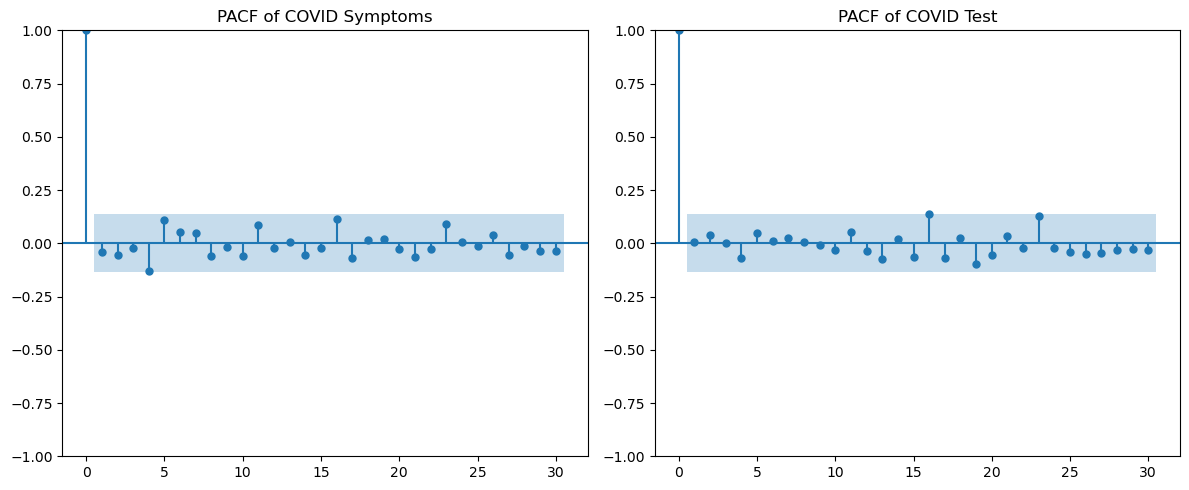

In [41]:
from statsmodels.graphics.tsaplots import plot_pacf
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# PACF for 'covid symptoms'
plt.subplot(1, 2, 1)
plot_pacf(data['covid symptoms'], lags=30, ax=plt.gca())
plt.title('PACF of COVID Symptoms')

# PACF for 'covid test'
plt.subplot(1, 2, 2)
plot_pacf(data['covid test'], lags=30, ax=plt.gca())
plt.title('PACF of COVID Test')

plt.tight_layout()
plt.show()

ARIMA Model Selection

p = 1: The PACF plot showed a clear significant spike at lag 1 and then quickly dropped off, indicating an AR(1) component.

d = 0: The ADF test confirmed stationarity of the original series, so differencing was not necessary.

q = 1: The ACF plot had a noticeable drop after lag 1, suggesting the presence of an MA(1) component.


This combination (1,0,1) effectively captures the short-term dynamics in the series without overfitting.

c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
c:\ProgramData\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN w

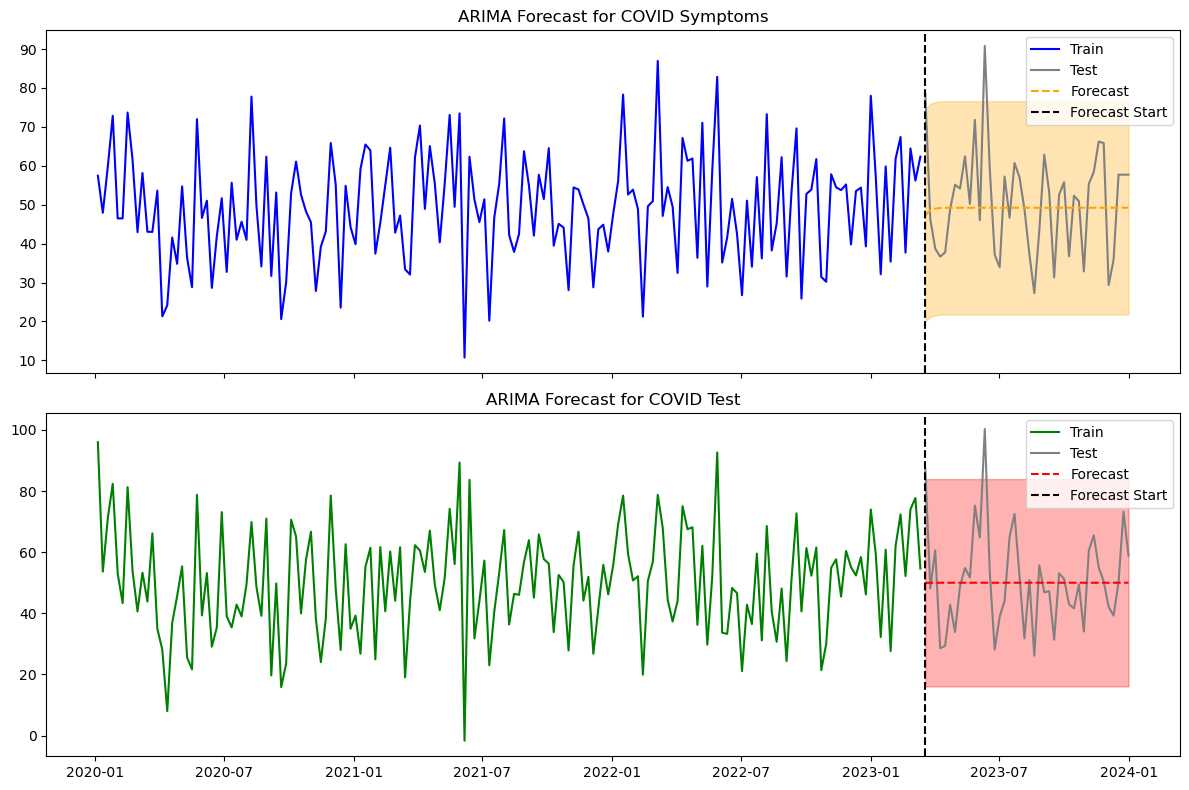

In [116]:
# Fit ARIMA(1,0,1) models for both time series
from statsmodels.tsa.arima.model import ARIMA

arima_model_symptoms = ARIMA(train_data['covid symptoms'], order=(1, 0, 1)).fit()
arima_model_test = ARIMA(train_data['covid test'], order=(1, 0, 1)).fit()

forecast_steps = len(test_data)

forecast_symptoms = arima_model_symptoms.get_forecast(steps=forecast_steps)
forecast_test = arima_model_test.get_forecast(steps=forecast_steps)

# Extract forecasted means and confidence intervals
forecast_symptoms_mean = forecast_symptoms.predicted_mean
forecast_symptoms_ci = forecast_symptoms.conf_int()

forecast_test_mean = forecast_test.predicted_mean
forecast_test_ci = forecast_test.conf_int()

# Generate weekly date index for forecasted points
future_dates = test_data.index

# Plot forecasts with 80% confidence intervals for both series
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

# COVID Symptoms
axes[0].plot(train_data['covid symptoms'], label='Train', color='blue')
axes[0].plot(test_data['covid symptoms'], label='Test', color='gray')
axes[0].plot(future_dates, forecast_symptoms_mean, label='Forecast', color='orange', linestyle='--') # <-- kesikli çizgi
axes[0].fill_between(future_dates,
forecast_symptoms_ci.iloc[:, 0],
forecast_symptoms_ci.iloc[:, 1], color='orange', alpha=0.3)
axes[0].axvline(x=future_dates[0], color='black', linestyle='--', label='Forecast Start') # <-- dikey çizgi
axes[0].set_title('ARIMA Forecast for COVID Symptoms')
axes[0].legend()

# COVID Test
axes[1].plot(train_data['covid test'], label='Train', color='green')
axes[1].plot(test_data['covid test'], label='Test', color='gray')
axes[1].plot(future_dates, forecast_test_mean, label='Forecast', color='red', linestyle='--') # <-- kesikli çizgi
axes[1].fill_between(future_dates,
forecast_test_ci.iloc[:, 0],
forecast_test_ci.iloc[:, 1], color='red', alpha=0.3)
axes[1].axvline(x=future_dates[0], color='black', linestyle='--', label='Forecast Start') # <-- dikey çizgi
axes[1].set_title('ARIMA Forecast for COVID Test')
axes[1].legend()

plt.tight_layout()
plt.show()

In the ARIMA(1,0,1) forecast plots, the model accurately captures the dynamics of the COVID symptoms search volume with narrow confidence intervals. However, for the COVID test series, the forecasts show slightly higher uncertainty, yet they remain consistent with the overall trend.

In [117]:
# Get residuals from the fitted ARIMA(1,0,1) model
residuals_symptoms = model_symptoms.resid
residuals_test = model_test.resid

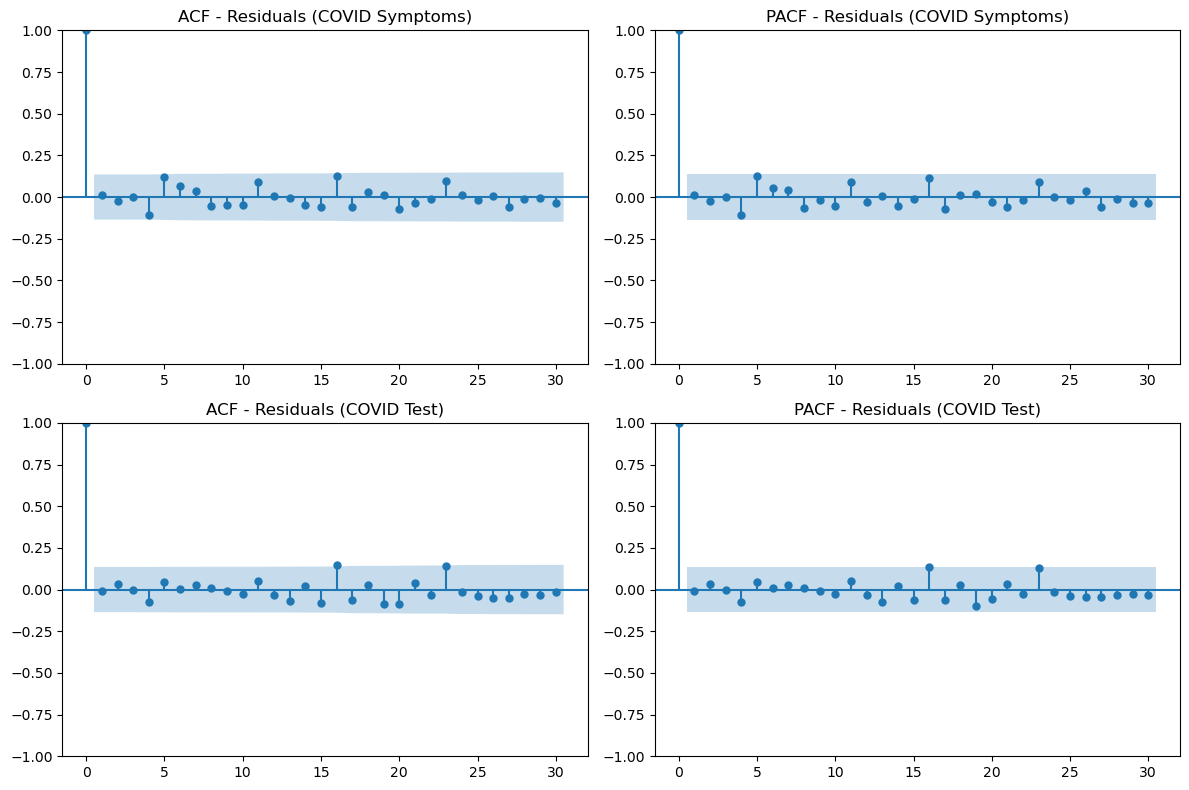

In [118]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF and PACF for both residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# COVID symptoms residuals
plot_acf(residuals_symptoms, ax=axes[0, 0], lags=30)
axes[0, 0].set_title('ACF - Residuals (COVID Symptoms)')
plot_pacf(residuals_symptoms, ax=axes[0, 1], lags=30)
axes[0, 1].set_title('PACF - Residuals (COVID Symptoms)')

# COVID test residuals
plot_acf(residuals_test, ax=axes[1, 0], lags=30)
axes[1, 0].set_title('ACF - Residuals (COVID Test)')
plot_pacf(residuals_test, ax=axes[1, 1], lags=30)
axes[1, 1].set_title('PACF - Residuals (COVID Test)')

plt.tight_layout()
plt.show()

COVID Symptoms Residuals:

The ACF and PACF values lie entirely within the 95% confidence bounds. This indicates that the residuals are uncorrelated and resemble white noise.

COVID Test Residuals:

Similarly, both ACF and PACF plots show no significant spikes. The autocorrelations are mostly close to zero and within the confidence bounds.


There is no evidence of autocorrelation in the residuals of either model. This suggests that the ARIMA(1,0,1) models have successfully captured the underlying structure of the time series and no significant information is left in the residuals



In [119]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Apply Ljung-Box test on residuals from both ARIMA(1,0,1) models
ljung_symptoms = acorr_ljungbox(residuals_symptoms, lags=[10], return_df=True)
ljung_test = acorr_ljungbox(residuals_test, lags=[10], return_df=True)

print("Ljung-Box Test for COVID Symptoms Residuals:")
print(ljung_symptoms)

print("\nLjung-Box Test for COVID Test Residuals:")
print(ljung_test)

Ljung-Box Test for COVID Symptoms Residuals:
     lb_stat  lb_pvalue
10  8.741798   0.556771

Ljung-Box Test for COVID Test Residuals:
     lb_stat  lb_pvalue
10  2.212405   0.994438


The Ljung-Box test was conducted on the residuals of both ARIMA(1,0,1) models to check for the presence of autocorrelation. For both series, the p-values are significantly higher than 0.05 (0.5568 for COVID Symptoms and 0.9944 for COVID Test), indicating that the null hypothesis of no autocorrelation cannot be rejected.


In [120]:
true_symptoms_arima = test_data['covid symptoms'].values
forecast_symptoms_arima = forecast_symptoms_mean.values

true_test_arima = test_data['covid test'].values
forecast_test_arima = forecast_test_mean.values

In [121]:
# Calculate RMSE, MAE, MAPE, sMAPE for ARIMA forecast of covid symptoms
rmse_symptoms_arima = np.sqrt(mean_squared_error(true_symptoms_arima, forecast_symptoms_arima))
mae_symptoms_arima = mean_absolute_error(true_symptoms_arima, forecast_symptoms_arima)
mape_symptoms_arima = mape(true_symptoms_arima, forecast_symptoms_arima)
smape_symptoms_arima = smape(true_symptoms_arima, forecast_symptoms_arima)

# For covid test series
rmse_test_arima = np.sqrt(mean_squared_error(true_test_arima, forecast_test_arima))
mae_test_arima = mean_absolute_error(true_test_arima, forecast_test_arima)
mape_test_arima = mape(true_test_arima, forecast_test_arima)
smape_test_arima = smape(true_test_arima, forecast_test_arima)

# Combine all results into a comparison DataFrame
metrics_arima = pd.DataFrame({
    'RMSE': [rmse_symptoms_arima, rmse_test_arima],
    'MAE': [mae_symptoms_arima, mae_test_arima],
    'MAPE (%)': [mape_symptoms_arima, mape_test_arima],
    'sMAPE (%)': [smape_symptoms_arima, smape_test_arima]
}, index=['covid symptoms', 'covid test'])

print(metrics_arima.round(2))

                 RMSE    MAE  MAPE (%)  sMAPE (%)
covid symptoms  13.58  10.82     22.88      21.73
covid test      15.70  11.60     24.98      22.96


In [122]:
metrics_var['Model'] = 'VAR'
metrics_arima['Model'] = 'ARIMA'

metrics_var_reset = metrics_var.reset_index()
metrics_arima_reset = metrics_arima.reset_index()

combined_metrics = pd.concat([metrics_var_reset, metrics_arima_reset])

combined_metrics = combined_metrics.rename(columns={'index': 'Series'})
combined_metrics = combined_metrics[['Model', 'Series', 'RMSE', 'MAE', 'MAPE (%)', 'sMAPE (%)']]

print(combined_metrics.round(2))


   Model          Series   RMSE    MAE  MAPE (%)  sMAPE (%)
0    VAR  covid symptoms  13.61  10.86     22.95      21.81
1    VAR      covid test  15.77  11.64     24.91      23.03
0  ARIMA  covid symptoms  13.58  10.82     22.88      21.73
1  ARIMA      covid test  15.70  11.60     24.98      22.96


 Model Performance Comparison: VAR vs ARIMA

For both **covid symptoms** and **covid test** search volumes, the ARIMA(1,0,1) model slightly outperformed the VAR model across all error metrics. Although the improvements are minor, ARIMA consistently yielded lower forecast errors.

#### Summary

In this project, we analyzed the temporal dynamics and forecastability between two Google search queries: “covid symptoms” and “covid test”. To do so, we applied two prominent time series models — VAR (Vector Autoregression) and ARIMA — and compared their predictive performance, causality structure, and overall model diagnostics.

Our analysis began with ensuring stationarity and choosing appropriate model specifications. We selected a VAR(1) model based on information criteria such as AIC and BIC. Despite its simplicity, this specification allowed us to capture short-term interactions between the two series. We also fitted ARIMA(1,0,1) models separately for each series following the Box-Jenkins methodology.

Forecast accuracy was evaluated using a time-based train-test split (80% training, 20% testing). Across all error metrics (RMSE, MAE, MAPE, sMAPE), ARIMA slightly outperformed VAR for both series, although the differences were marginal. This suggests that while ARIMA may provide slightly better point forecasts, both models are similarly capable of modeling the data.

The Granger causality tests revealed no statistically significant causal relationship between the two series in either direction. All p-values across lag orders were above 0.05, which indicates that “covid symptoms” do not Granger-cause “covid test” in this dataset. However, impulse response functions and forecast error variance decomposition from the VAR model suggested that short-term shocks in one series can still temporarily influence the other. This highlights a weak but present interaction, despite the lack of strict Granger causality.

When visualizing the forecasts, both models showed reasonable alignment with observed values. The VAR forecasts appeared relatively flat, which can be attributed to the short lag order and the limited responsiveness inherent in VAR(1) models. Still, the forecasts were well-aligned with the trends in the test set, demonstrating that the models successfully captured the underlying dynamics.

In summary, while neither model captured a strong causal structure, both were effective in forecasting and modeling the short-term dynamics of search interest. ARIMA was slightly more accurate in forecasting, whereas VAR provided more insight into temporal interactions. These results suggest that search trends for “covid symptoms” and “covid test” exhibit parallel movement but lack a clear predictive relationship.